# make GIF

In [4]:
from PIL import Image
from PIL import ImageDraw


def draw_view_point(img, point, n_angle=9):
    d = ImageDraw.Draw(img)
    size = 14
    x, y = 1024-size*n_angle, 436-size*n_angle
    for i in range(1, n_angle+1):
        for j in range(1, n_angle+1):
            d.rectangle([(x,y), (x+size,y+size)], fill='yellow', outline='green',  width=3)
            y += size
        y = 436-size*n_angle
        x += size

    # draw point
    x, y = 1024-size*n_angle, 436-size*n_angle
    d.rectangle([(x+size*point[1], y+size*point[0]), (x+size*(point[1]+1), y+size*(point[0]+1))], fill='red', outline='green',  width=3)
    return img

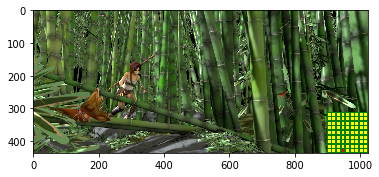

In [5]:
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('../rendering/clean/05.2_bamboo/05.2b_comp/9x9_baseline0.01/08_03/0094.png')

plt.imshow(np.array(draw_view_point(img, (8,3), n_angle=9)))
# im.save('out.gif', save_all=True, append_images=[im1, im2, ...])

In [6]:
import glob
img_list = []
for img in glob.glob("../rendering/clean/05.2_bamboo/05.2b_comp/9x9_baseline0.01/08_03/*.png"):
    img_list.append(Image.open(img))
img_list[0].save('out.gif', save_all=True, append_images=img_list[1:])

# OpenEXR
https://qiita.com/studio_haneya/items/3adeae5fe527023eed11

In [11]:
import numpy as np
import OpenEXR as exr
import Imath

def readEXR(filename):
    """Read color + depth data from EXR image file.
    
    Parameters
    ----------
    filename : str
        File path.
        
    Returns
    -------
    img : RGB or RGBA image in float32 format. Each color channel
          lies within the interval [0, 1].
          Color conversion from linear RGB to standard RGB is performed
          internally. See https://en.wikipedia.org/wiki/SRGB#The_forward_transformation_(CIE_XYZ_to_sRGB)
          for more information.
          
    Z : Depth buffer in float32 format or None if the EXR file has no Z channel.
    """
    
    exrfile = exr.InputFile(filename)
    header = exrfile.header()
    
    dw = header['dataWindow']
    isize = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    
    channelData = dict()
    
    # convert all channels in the image to numpy arrays
    print(header['channels'])
    for c in header['channels']:
        C = exrfile.channel(c, Imath.PixelType(Imath.PixelType.FLOAT))
        C = np.fromstring(C, dtype=np.float32)
        C = np.reshape(C, isize)
        
        channelData[c] = C
    
    colorChannels = ['R', 'G', 'B', 'A'] if 'A' in header['channels'] else ['R', 'G', 'B']
    img = np.concatenate([channelData[c][...,np.newaxis] for c in colorChannels], axis=2)
    
    # linear to standard RGB
    img[..., :3] = np.where(img[..., :3] <= 0.0031308,
                            12.92 * img[..., :3],
                            1.055 * np.power(img[..., :3], 1 / 2.4) - 0.055)
    
    # sanitize image to be in range [0, 1]
    img = np.where(img < 0.0, 0.0, np.where(img > 1.0, 1, img))
    
    Z = None if 'Z' not in header['channels'] else channelData['Z']
    
    return img, Z

{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in power


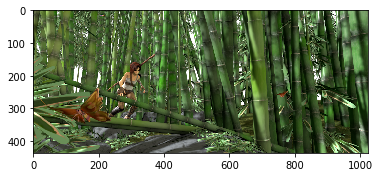

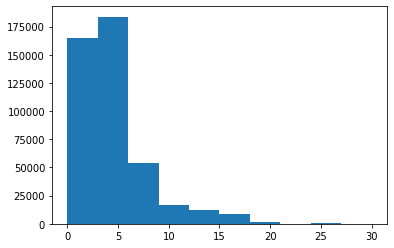

In [48]:
img, Z = readEXR('../rendering/clean/05.2_bamboo/05.2b_comp/9x9_baseline0.01/08_03/Z0094.exr')
plt.figure()
plt.imshow(img)
plt.show()

plt.hist(Z.flatten(), range=(0, 30))
plt.show()

plt.figure()
plt.imshow(Z, vmax=10)
plt.show()

{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


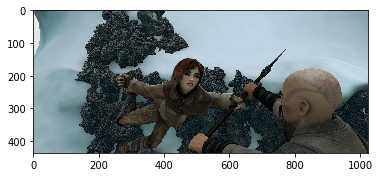

In [43]:
img, Z = readEXR('../rendering/clean/05.8_ambushfight/05.8j_comp/9x9_baseline0.01/00_00/Z0728.exr')
plt.figure()
plt.imshow(img)
plt.show()

plt.hist(Z.flatten(), range=(0, 30))
plt.show()

plt.figure()
plt.imshow(Z, vmax=10)
plt.show()

{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


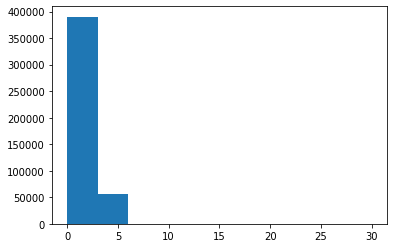

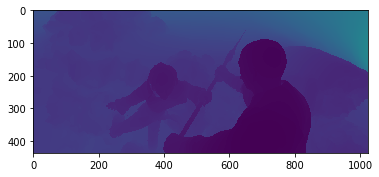

In [57]:
img, Z = readEXR('../rendering/clean/05.8_ambushfight/05.8j_comp/9x9_baseline0.01/00_00/Z0725.exr')
plt.figure()
plt.imshow(img)
plt.show()

plt.hist(Z.flatten(), range=(0, 30))
plt.show()

plt.figure()
plt.imshow(Z, vmax=10)
plt.show()

{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


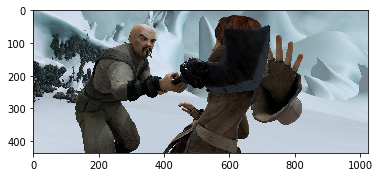

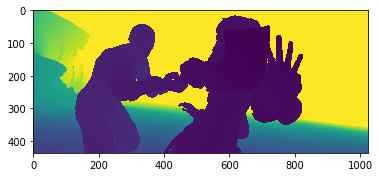

In [61]:
img, Z = readEXR('../rendering/clean/05.8_ambushfight/05.8f_comp/9x9_baseline0.01/00_00/Z0494.exr')
plt.figure()
plt.imshow(img)
plt.show()

plt.hist(Z.flatten(), range=(0, 30))
plt.show()

plt.figure()
plt.imshow(Z, vmax=15)
plt.show()

{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in power


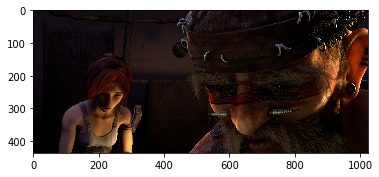

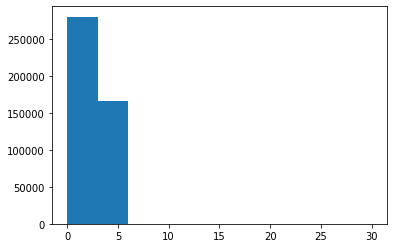

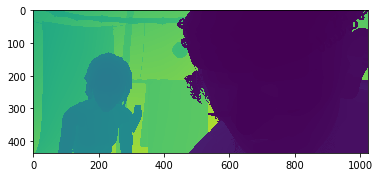

In [75]:
img, Z = readEXR('../rendering/clean/06_shaman_b/06.e_comp/9x9_baseline0.01/00_00/Z0376.exr')
plt.figure()
plt.imshow(img[...,:3])
plt.show()

plt.hist(Z.flatten(), range=(0, 30))
plt.show()

plt.figure()
plt.imshow(Z, vmax=5)
plt.show()

{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in power


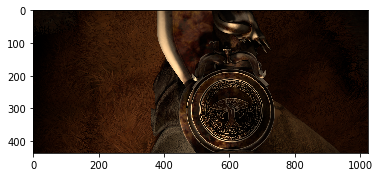

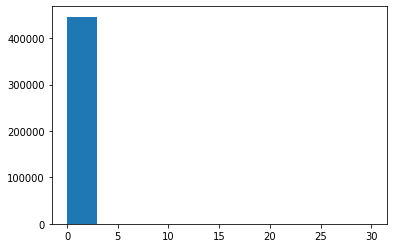

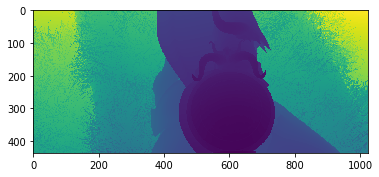

In [72]:
img, Z = readEXR('../rendering/clean/06_shaman_b/06.k_comp/9x9_baseline0.01/00_00/Z0710.exr')
plt.figure()
plt.imshow(img)
plt.show()

plt.hist(Z.flatten(), range=(0, 30))
plt.show()

plt.figure()
plt.imshow(Z, vmax=min(Z.max(),15))
plt.show()

# all exr check

In [93]:
import glob

l = glob.glob('../rendering/clean/**/9x9_baseline0.01', recursive=True)
print(l)

['../rendering/clean\\02_shaman\\02.a_comp\\9x9_baseline0.01', '../rendering/clean\\02_shaman\\02.b_comp\\9x9_baseline0.01', '../rendering/clean\\02_shaman\\02.f_comp\\9x9_baseline0.01', '../rendering/clean\\03.3_sleeping\\03.3c_comp\\9x9_baseline0.01', '../rendering/clean\\03.3_sleeping\\03.3d_comp\\9x9_baseline0.01', '../rendering/clean\\04.1_ziggurat\\04.1c_comp\\9x9_baseline0.01', '../rendering/clean\\05.1_questbegins\\05.1b_comp\\9x9_baseline0.01', '../rendering/clean\\05.2_bamboo\\05.2a_comp\\9x9_baseline0.01', '../rendering/clean\\05.2_bamboo\\05.2b_comp\\9x9_baseline0.01', '../rendering/clean\\05.2_bamboo\\05.2c_comp\\9x9_baseline0.01', '../rendering/clean\\05.4_foggyrocks\\05.4a_comp\\9x9_baseline0.01', '../rendering/clean\\05.4_foggyrocks\\05.4b_comp\\9x9_baseline0.01', '../rendering/clean\\05.8_ambushfight\\05.8d_comp\\9x9_baseline0.01', '../rendering/clean\\05.8_ambushfight\\05.8f_comp\\9x9_baseline0.01', '../rendering/clean\\05.8_ambushfight\\05.8g_comp\\9x9_baseline0.01',

../rendering/clean\02_shaman\02.a_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in power


0.10000148 4.6708255


../rendering/clean\02_shaman\02.b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


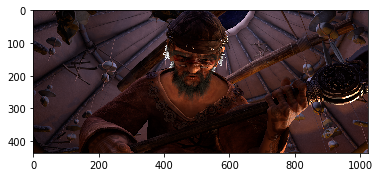

0.77172655 7.6464434


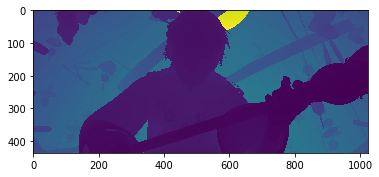

../rendering/clean\02_shaman\02.f_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


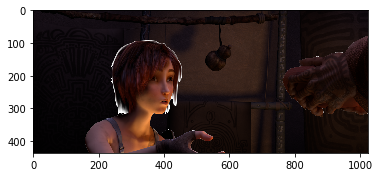

1.0863427 3.4586308


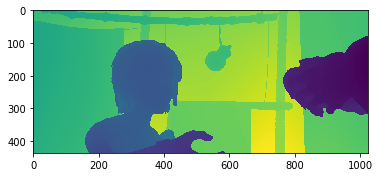

../rendering/clean\03.3_sleeping\03.3c_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


1.4635218 100000000000.0


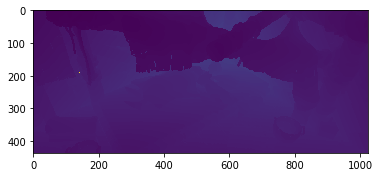

../rendering/clean\03.3_sleeping\03.3d_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


0.22466056 100000000000.0


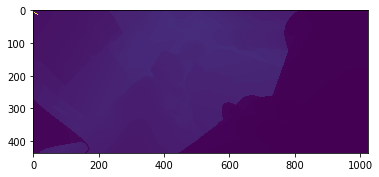

../rendering/clean\04.1_ziggurat\04.1c_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


3.6837976 354.67645


../rendering/clean\05.1_questbegins\05.1b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


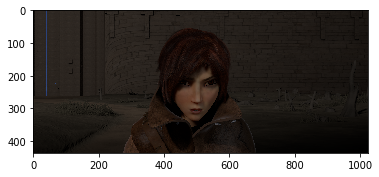

1.4001454 786.56445


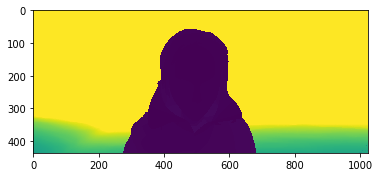

../rendering/clean\05.2_bamboo\05.2a_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


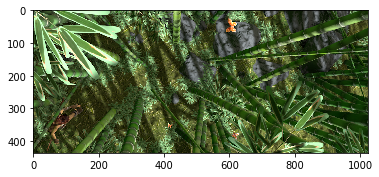

1.1051877 9.741758


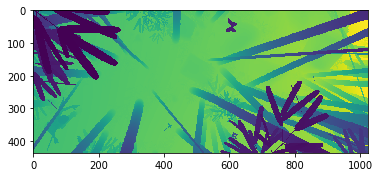

../rendering/clean\05.2_bamboo\05.2b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


0.82180685 100000000000.0


../rendering/clean\05.2_bamboo\05.2c_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


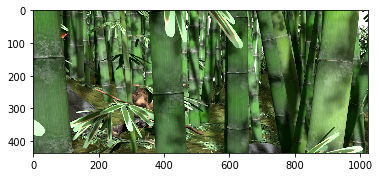

0.8793303 100000000000.0


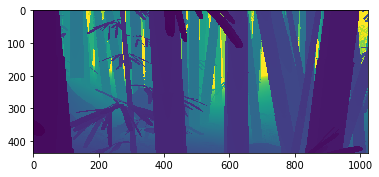

../rendering/clean\05.4_foggyrocks\05.4a_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


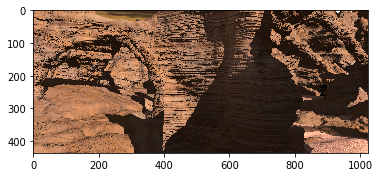

1.7619094 100000000000.0


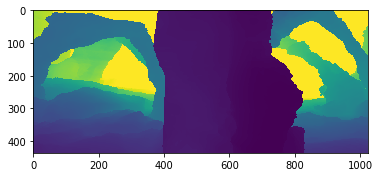

../rendering/clean\05.4_foggyrocks\05.4b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


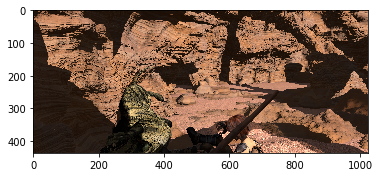

1.2869288 20.271917


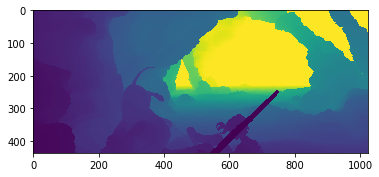

../rendering/clean\05.8_ambushfight\05.8d_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


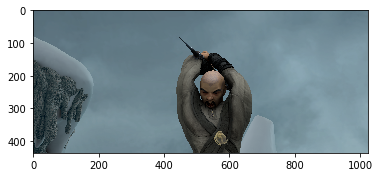

3.66703 2633.1182


../rendering/clean\05.8_ambushfight\05.8f_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


0.50906664 2475.922


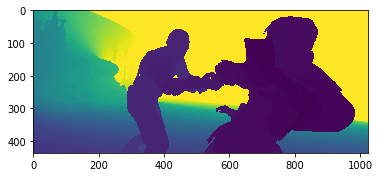

../rendering/clean\05.8_ambushfight\05.8g_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


0.13113838 2519.0417


../rendering/clean\05.8_ambushfight\05.8h_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


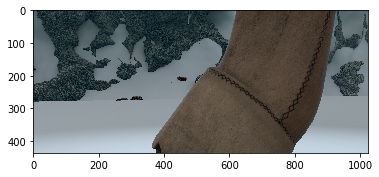

0.35851502 9.397611


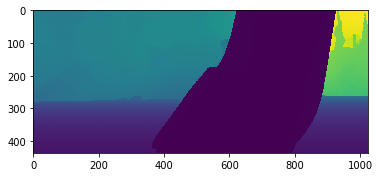

../rendering/clean\05.8_ambushfight\05.8i_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


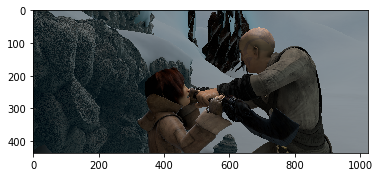

1.2042967 700.3734


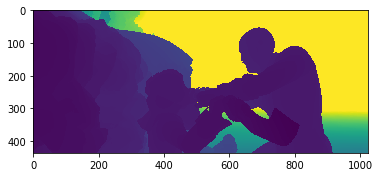

../rendering/clean\05.8_ambushfight\05.8j_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


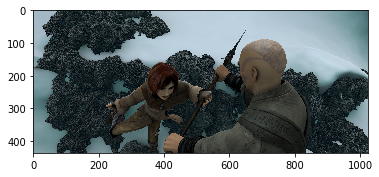

0.7555925 5.0180225


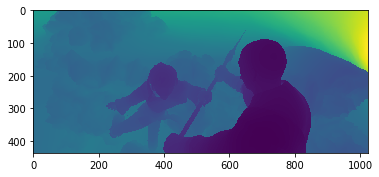

../rendering/clean\06_shaman_b\06.e_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


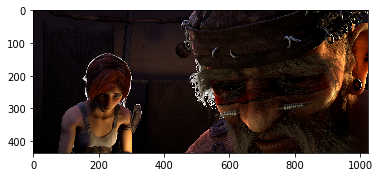

0.57946676 4.4533343


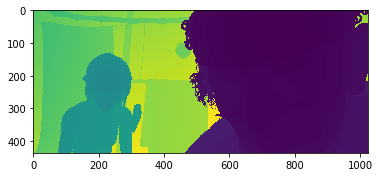

../rendering/clean\06_shaman_b\06.k_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


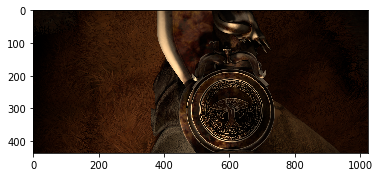

0.47565377 0.9621048


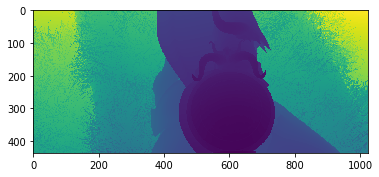

../rendering/clean\08.2_thebigfight\08.2g_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


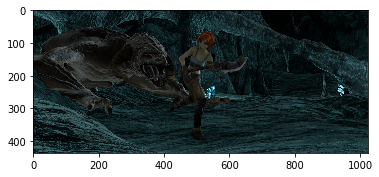

3.1506195 64.7719


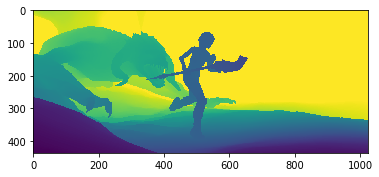

../rendering/clean\08.2_thebigfight\08.2l_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


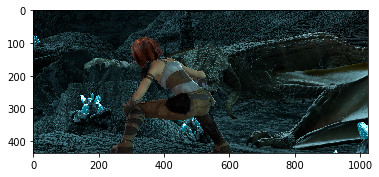

1.4072182 80.34041


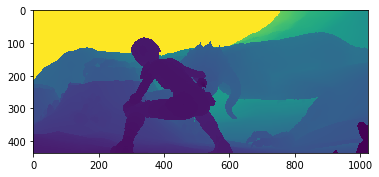

../rendering/clean\08.2_thebigfight\08.2q_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


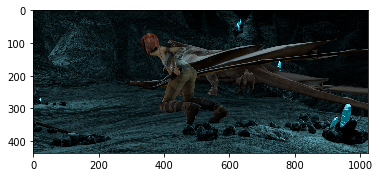

2.5488157 192.83197


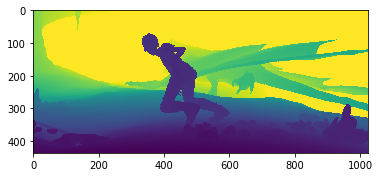

In [101]:
for scene in l:
    print(scene)
    img, Z = readEXR(glob.glob(scene+'/00_00/*.exr')[0])
    plt.figure()
    plt.imshow(img)
    plt.show()
    
    print(Z.min(), Z.max())
    plt.figure()
    plt.imshow(Z, vmax=min(Z.max(),15))
    plt.show()

../rendering/clean\02_shaman\02.a_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
c:\users\kinoshita\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in power


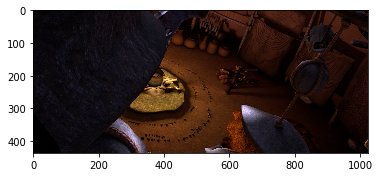

0.10000148 4.6708255


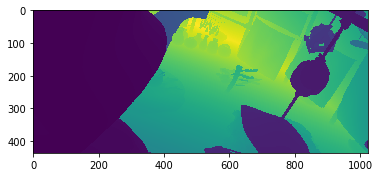

../rendering/clean\02_shaman\02.b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


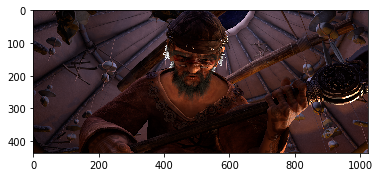

0.77172655 7.6464434


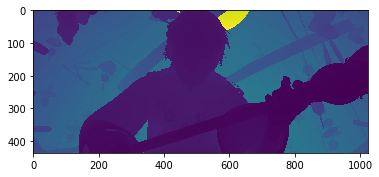

../rendering/clean\02_shaman\02.f_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


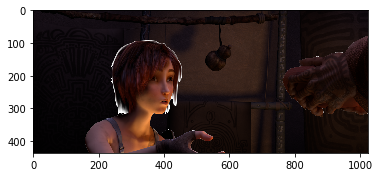

1.0863427 3.4586308


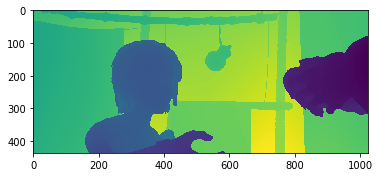

../rendering/clean\03.3_sleeping\03.3c_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


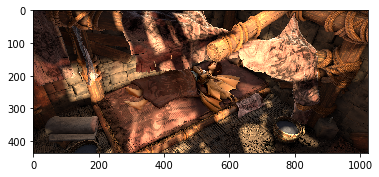

1.4635218 100000000000.0


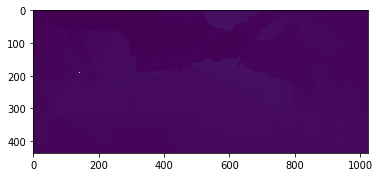

../rendering/clean\03.3_sleeping\03.3d_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


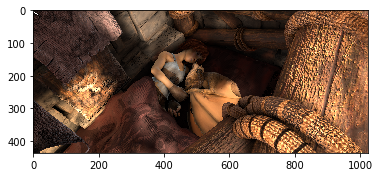

0.22466056 100000000000.0


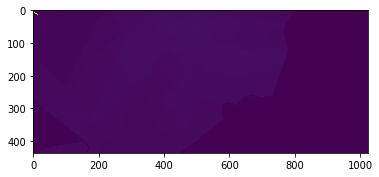

../rendering/clean\04.1_ziggurat\04.1c_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


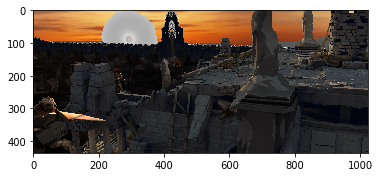

3.6837976 354.67645


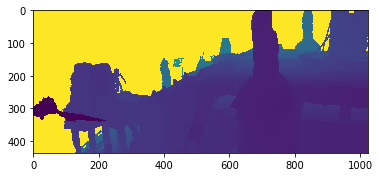

../rendering/clean\05.1_questbegins\05.1b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


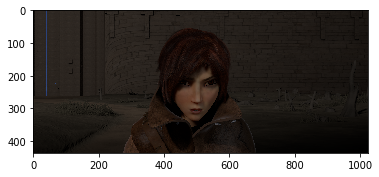

1.4001454 786.56445


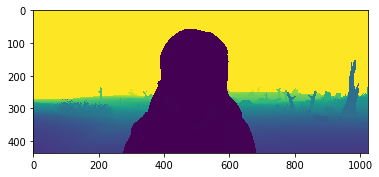

../rendering/clean\05.2_bamboo\05.2a_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


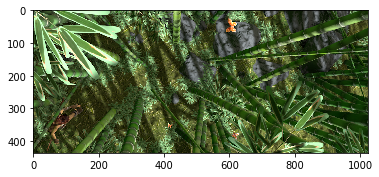

1.1051877 9.741758


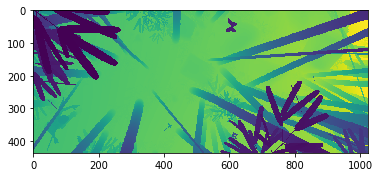

../rendering/clean\05.2_bamboo\05.2b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


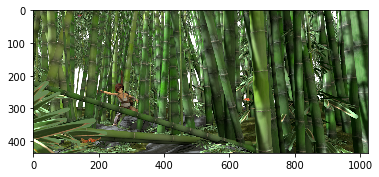

0.82180685 100000000000.0


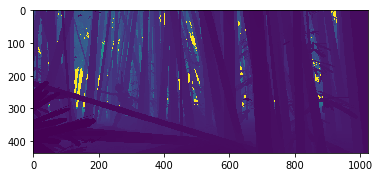

../rendering/clean\05.2_bamboo\05.2c_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


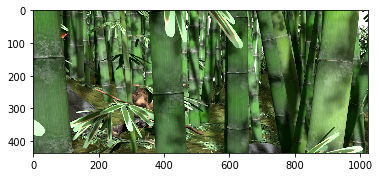

0.8793303 100000000000.0


../rendering/clean\05.4_foggyrocks\05.4a_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


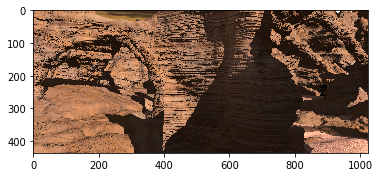

1.7619094 100000000000.0


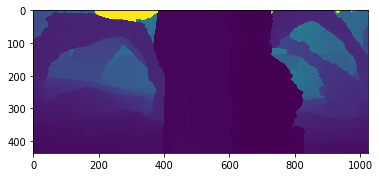

../rendering/clean\05.4_foggyrocks\05.4b_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


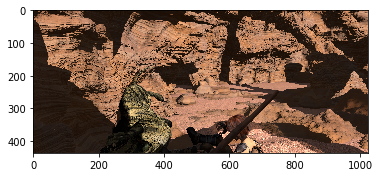

1.2869288 20.271917


../rendering/clean\05.8_ambushfight\05.8d_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


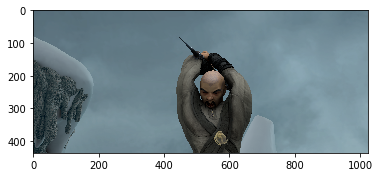

3.66703 2633.1182


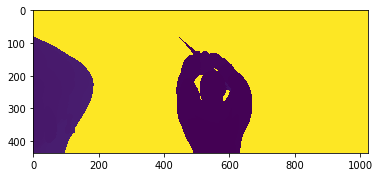

../rendering/clean\05.8_ambushfight\05.8f_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


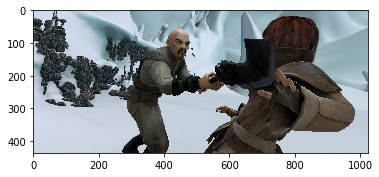

0.50906664 2475.922


../rendering/clean\05.8_ambushfight\05.8g_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


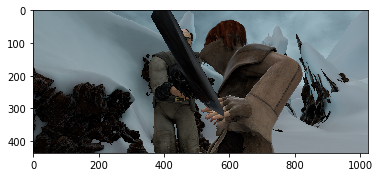

0.13113838 2519.0417


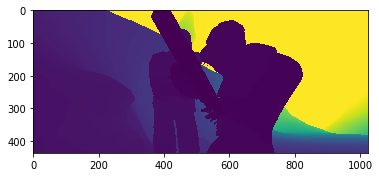

../rendering/clean\05.8_ambushfight\05.8h_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


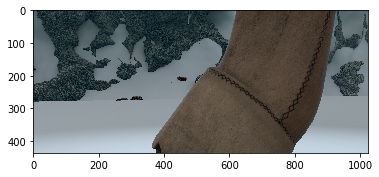

0.35851502 9.397611


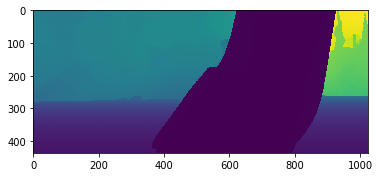

../rendering/clean\05.8_ambushfight\05.8i_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


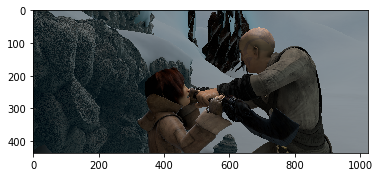

1.2042967 700.3734


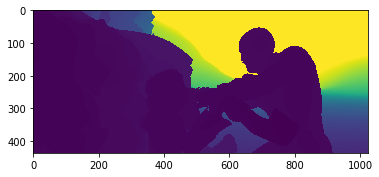

../rendering/clean\05.8_ambushfight\05.8j_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


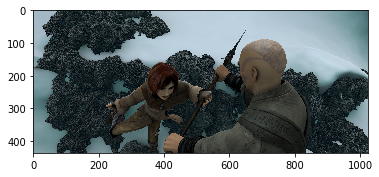

0.7555925 5.0180225


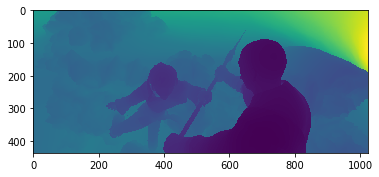

../rendering/clean\06_shaman_b\06.e_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


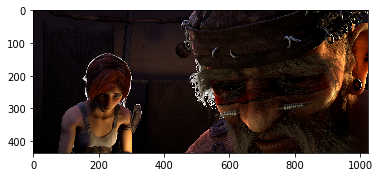

0.57946676 4.4533343


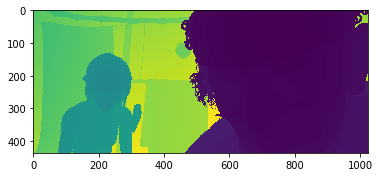

../rendering/clean\06_shaman_b\06.k_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


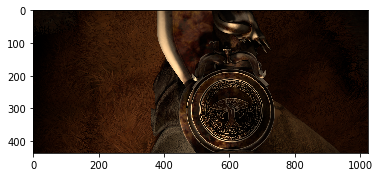

0.47565377 0.9621048


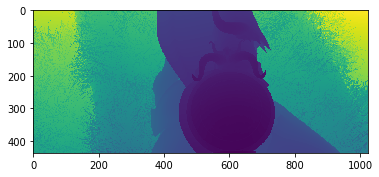

../rendering/clean\08.2_thebigfight\08.2g_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


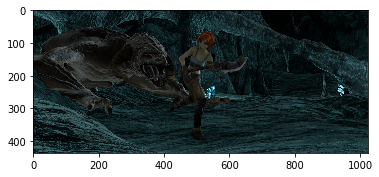

3.1506195 64.7719


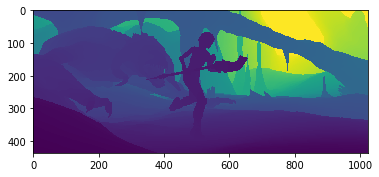

../rendering/clean\08.2_thebigfight\08.2l_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


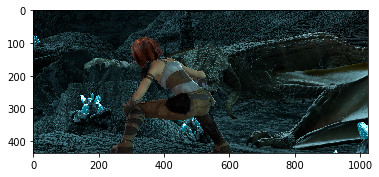

1.4072182 80.34041


../rendering/clean\08.2_thebigfight\08.2q_comp\9x9_baseline0.01
{'A': FLOAT (1, 1), 'B': FLOAT (1, 1), 'G': FLOAT (1, 1), 'R': FLOAT (1, 1), 'Z': FLOAT (1, 1)}


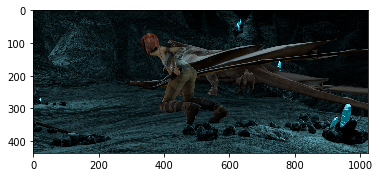

2.5488157 192.83197


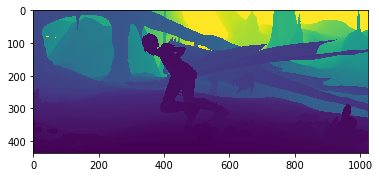

In [102]:
for scene in l:
    print(scene)
    img, Z = readEXR(glob.glob(scene+'/00_00/*.exr')[0])
    plt.figure()
    plt.imshow(img)
    plt.show()
    
    print(Z.min(), Z.max())
    plt.figure()
    plt.imshow(Z, vmax=min(Z.max(),50))
    plt.show()